###Exploratory Data Analysis(EDA)

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:

# File path
file_path = r"MAIN DATASET PATH HERE"

# Read the dataset
covid_data = pd.read_csv(file_path)

# Count the unique countries
unique_countries = covid_data['Country/Region'].nunique()

# Display the unique country count and first few rows
print(f"The dataset contains {unique_countries} unique countries.")
print(covid_data.head())


The dataset contains 187 unique countries.
  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  


In [ ]:
# Group by country and aggregate
country_data = covid_data.groupby('Country/Region').sum(numeric_only=True).reset_index()

# Display the new dataset
print(country_data.head())

# Save the new dataset to a file (optional)
output_path = r"WHERE TO SAVE THE AGGREGATED DATA PATH HERE"
country_data.to_csv(output_path, index=False)
print(f"Aggregated data saved to {output_path}")

  Country/Region         Lat          Long  Confirmed  Deaths  Recovered  \
0    Afghanistan  6380.55268  12729.471164    1936390   49098     798240   
1        Albania  7736.82040   3791.640400     196702    5708     118877   
2        Algeria  5270.37320    312.004800    1179755   77972     755897   
3        Andorra  7991.18440    286.098400      94404    5423      69074   
4         Angola -2106.10760   3360.293200      22662    1078       6573   

    Active  
0  1089052  
1    72117  
2   345886  
3    19907  
4    15011  
Aggregated data saved to C:\Users\L00P\Desktop\DigiMark Internship\Week3\Ticket05-Exploratory Data Analysis(EDA)\01aggregated_country_data.csv


In [ ]:
# Calculate the death ratio (handling cases where confirmed cases are 0)
country_data['Death Ratio (%)'] = (country_data['Deaths'] / country_data['Confirmed']).fillna(0) * 100

# Create a new DataFrame with only relevant columns
death_ratio_df = country_data[['Country/Region', 'Deaths', 'Confirmed', 'Death Ratio (%)']]

# Display the new DataFrame
print(death_ratio_df.head())

# Save the new DataFrame (optional)
output_path = r"WHERE TO SAVE THE DEATH RATIO DATA PATH HERE"
death_ratio_df.to_csv(output_path, index=False)
print(f"Death ratio data saved to {output_path}")

  Country/Region  Deaths  Confirmed  Death Ratio (%)
0    Afghanistan   49098    1936390         2.535543
1        Albania    5708     196702         2.901852
2        Algeria   77972    1179755         6.609169
3        Andorra    5423      94404         5.744460
4         Angola    1078      22662         4.756862
Death ratio data saved to C:\Users\L00P\Desktop\DigiMark Internship\Week3\Ticket05-Exploratory Data Analysis(EDA)\02death_ratio_data.csv


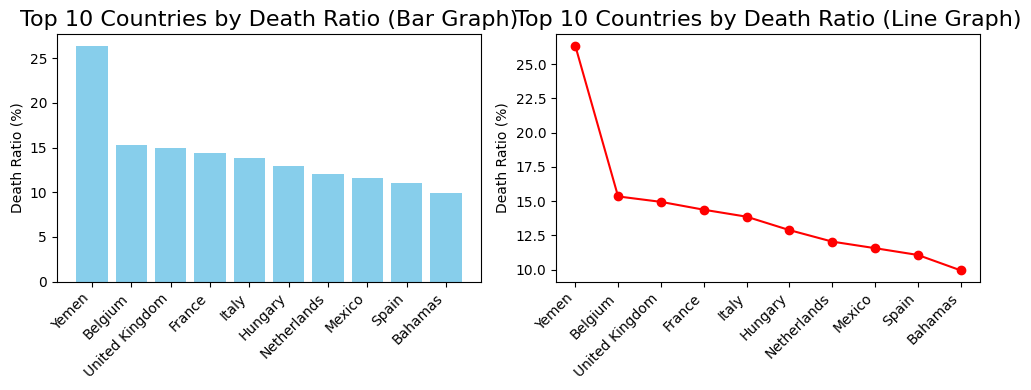

In [17]:
# Sort by death ratio and get the top 10 countries
top_10_countries = country_data.nlargest(10, 'Death Ratio (%)')

# Plotting
plt.figure(figsize=(10, 4))

# Bar graph
plt.subplot(1, 2, 1)
plt.bar(top_10_countries['Country/Region'], top_10_countries['Death Ratio (%)'], color='skyblue')
plt.title('Top 10 Countries by Death Ratio (Bar Graph)', fontsize=16)
plt.ylabel('Death Ratio (%)')
plt.xticks(rotation=45, ha='right')

# Line graph
plt.subplot(1, 2, 2)
plt.plot(top_10_countries['Country/Region'], top_10_countries['Death Ratio (%)'], marker='o', color='red')
plt.title('Top 10 Countries by Death Ratio (Line Graph)', fontsize=16)
plt.ylabel('Death Ratio (%)')
plt.xticks(rotation=45, ha='right')

# Show plots
plt.tight_layout()
plt.show()

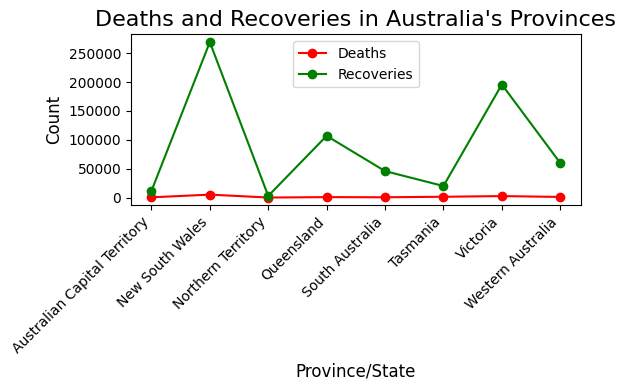

In [ ]:
# Filter data for Australia
australia_data = covid_data[covid_data['Country/Region'] == 'Australia']

# Group by province/state and sum the deaths and recoveries
province_data = australia_data.groupby('Province/State').sum(numeric_only=True).reset_index()

# Plotting deaths and recoveries for provinces in Australia
plt.figure(figsize=(6, 4))

# Line for deaths
plt.plot(province_data['Province/State'], province_data['Deaths'], marker='o', label='Deaths', color='red')

# Line for recoveries
plt.plot(province_data['Province/State'], province_data['Recovered'], marker='o', label='Recoveries', color='green')

# Add titles and labels
plt.title("Deaths and Recoveries in Australia's Provinces", fontsize=16)
plt.xlabel('Province/State', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


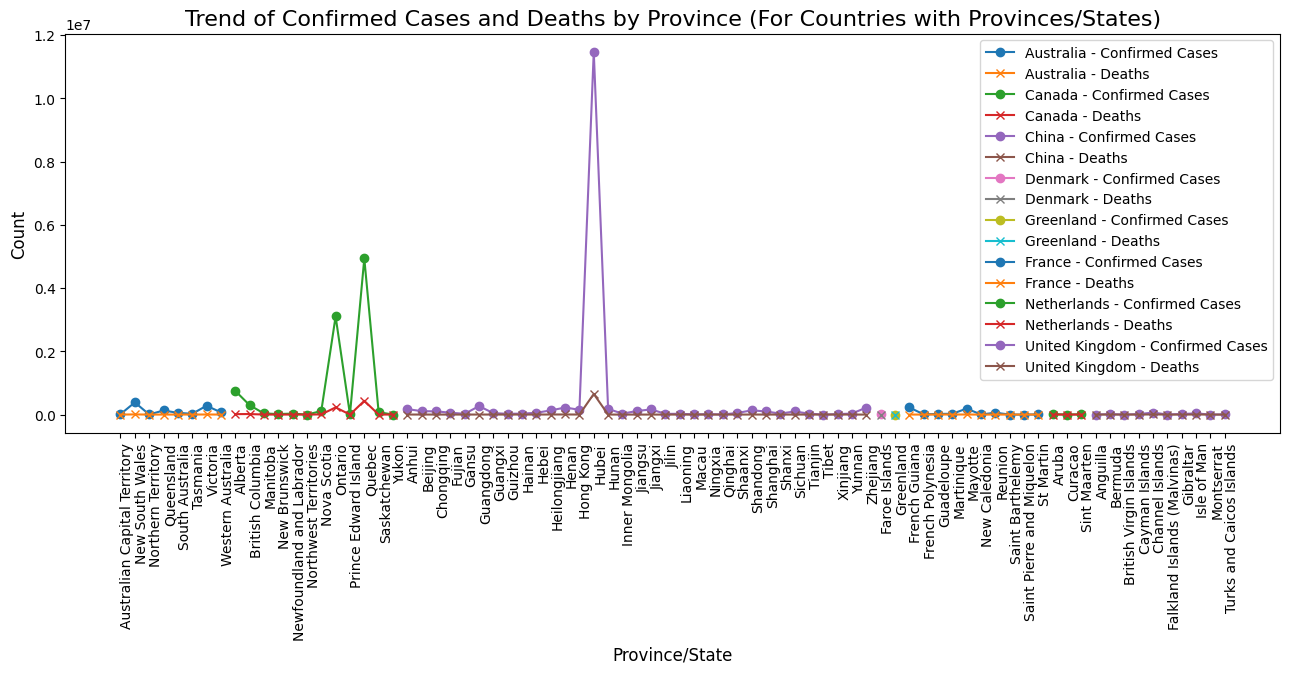

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset (replace with your actual file path)
file_path = r"MAIN DATASET PATH HERE"
covid_data = pd.read_csv(file_path)

# Filter countries that have provinces/states (i.e., where 'Province/State' is not NaN)
countries_with_provinces = covid_data[covid_data['Province/State'].notna()]

# List of unique countries with provinces/states
countries_with_provinces_list = countries_with_provinces['Country/Region'].unique()

# Plotting: Trend between confirmed cases and deaths for countries with provinces/states
plt.figure(figsize=(13, 7))

# Loop over each country with provinces/states
for country in countries_with_provinces_list:
    country_data = countries_with_provinces[countries_with_provinces['Country/Region'] == country]
    
    # Aggregate data by province/state
    province_data = country_data.groupby('Province/State').sum(numeric_only=True).reset_index()
    
    # Plot the trend for confirmed cases and deaths in each province
    plt.plot(province_data['Province/State'], province_data['Confirmed'], label=f'{country} - Confirmed Cases', marker='o')
    plt.plot(province_data['Province/State'], province_data['Deaths'], label=f'{country} - Deaths', marker='x')

# Add titles and labels
plt.title('Trend of Confirmed Cases and Deaths by Province (For Countries with Provinces/States)', fontsize=16)
plt.xlabel('Province/State', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90, ha='left')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


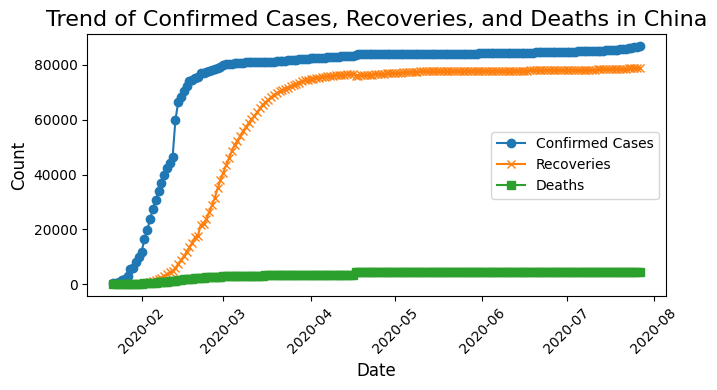

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# File path (replace with your actual file path)
covid_file_path = r"MAIN DATASET PATH HERE"

# Read the dataset
covid_data = pd.read_csv(covid_file_path)

# Ensure the Date column is in datetime format
covid_data['Date'] = pd.to_datetime(covid_data['Date'])

# Filter the data for China
china_data = covid_data[covid_data['Country/Region'] == 'China']

# Aggregate data by Date (sum the confirmed cases, recoveries, and deaths for China)
china_data_aggregated = china_data.groupby('Date').sum(numeric_only=True).reset_index()

# Plotting: Trend between time (Date) and confirmed cases, recoveries, deaths for China
plt.figure(figsize=(7, 4))

# Plot confirmed cases, recoveries, and deaths
plt.plot(china_data_aggregated['Date'], china_data_aggregated['Confirmed'], label='Confirmed Cases', marker='o')
plt.plot(china_data_aggregated['Date'], china_data_aggregated['Recovered'], label='Recoveries', marker='x')
plt.plot(china_data_aggregated['Date'], china_data_aggregated['Deaths'], label='Deaths', marker='s')

# Add titles and labels
plt.title("Trend of Confirmed Cases, Recoveries, and Deaths in China", fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()
